1. Detect the squares that bounds each single dice
2. For each of these squares, detect the dots that are inside and count them

In [1]:
import numpy as np
import os
import cv2
from matplotlib import pylab as plt 


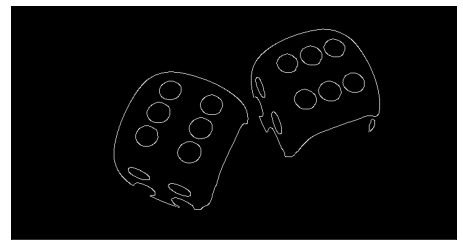

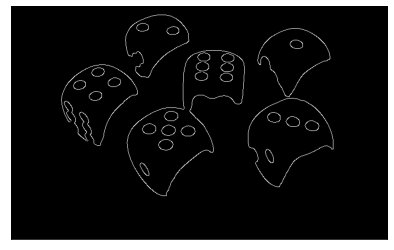

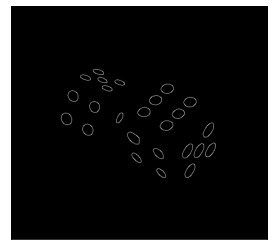

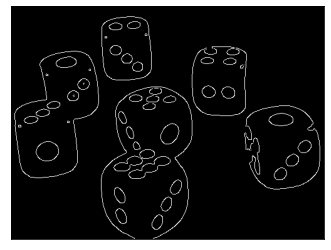

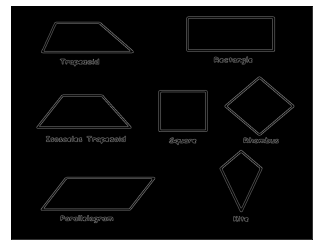

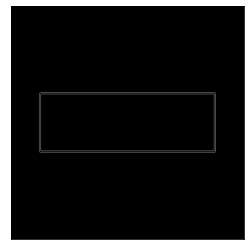

In [2]:
directory = r'.\images'
dices = []
original_dices = []
i = 0
for dice_image in os.scandir(directory):
    dices.append(dice_image.path)
    
    plt.figure(figsize=(30, 30))

    img = cv2.imread(dices[i])
    original_dices.append(img)
    
    # 0. Change colorscale to gray
    imggrayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # 1. Blurring dices to remove sharp edges
    blur = cv2.blur(imggrayscale, (4, 4), 0)
    
    # 2. Threshold
    _, thresholded = cv2.threshold(blur, 160, 255, cv2.THRESH_BINARY)
    
    # 3. Canny filter to detect edges 
    dices[i] = cv2.Canny(thresholded, 100, 550)
    
    ax = plt.subplot(6, 3, i+1)
    ax.imshow(dices[i], cmap='gray')
    ax.set_xticks([]), ax.set_yticks([])
    ax.axis([0, img.shape[1], img.shape[0], 0])
    
    i += 1
    
    
#dices

1. Finding contours.
2. Finding the minimum area rectangles that enclose all the points of each contours.

In [12]:
def plot_histogram(data, min_area, max_area):
    
    histo, x = np.histogram(img, range(0, 256), density=True)
    plot(histo)
    xlim(0, 255)

[814, 814, 735, 735, 1404, 1404, 1258, 1258, 242, 1330, 1330, 629, 629, 1292, 1292, 1221, 1221, 1221, 1221, 1254, 1254, 1116, 1116, 528, 528, 1152, 1152, 48391, 1085, 1085, 1152, 1152, 1050, 1050, 43056]
35
[190, 3510, 27710, 27710, 432, 432, 588, 588, 540, 540, 500, 500, 450, 450, 432, 432, 450, 450, 425, 425, 22630, 62550, 62550, 450, 450, 609, 609, 588, 588, 567, 567, 567, 567, 513, 513, 425, 425, 425, 425, 450, 425, 425, 408, 408, 18209, 18209, 425, 425, 14640, 14640, 384, 384, 384, 384]
54
[625, 625, 999, 999, 650, 650, 756, 756, 999, 999, 1064, 1064, 999, 999, 1024, 1024, 840, 840, 1064, 1064, 884, 884, 899, 899, 486, 486, 858, 858, 858, 858, 783, 783, 858, 858, 858, 858, 783, 783, 405, 405, 850, 850, 390, 390, 350, 350, 405, 405, 420, 420]
50
[432, 432, 450, 450, 432, 432, 468, 468, 456, 456, 420, 420, 2412, 2412, 420, 420, 1, 2310, 15, 50, 168, 168, 462, 462, 84, 260, 260, 207, 1020, 1020, 840, 840, 280, 280, 15946, 231, 252, 252, 231, 252, 252, 200, 7, 418, 418, 35478, 440, 44

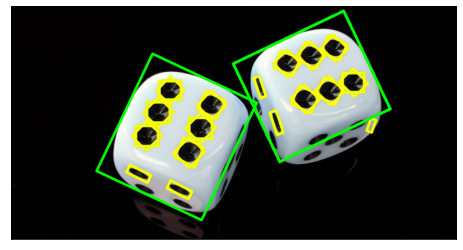

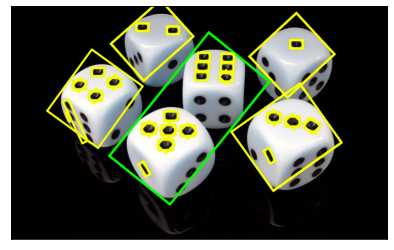

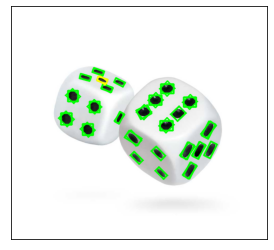

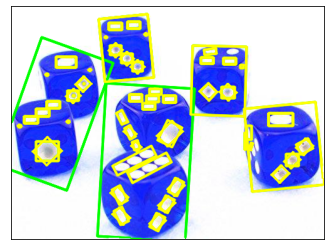

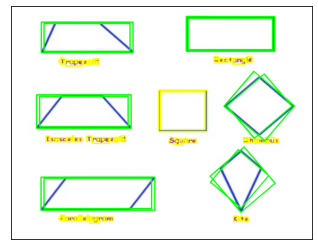

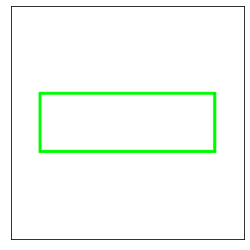

In [34]:
i = 0
dice_areas = []
for dice_image, original in zip(dices, original_dices):
    
    plt.figure(figsize=(30, 30))
   
    # 4. Finding contours of an image.
    contours, hierarchy = cv2.findContours(dice_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    areas = []
    for contour in contours:
        
        # Calculate area
        _, _, width, height = cv2.boundingRect(contour)
        areas.append(width*height)
        
#     print(max(areas), min(areas))
    print(areas)
    print(len(areas))
    dice_areas.append(areas)
    
    labels = []
    middle = (max(areas) - min(areas)) / 2
    for area in areas:
        if area > middle:
            labels.append('kostka')
        else:
            labels.append('oczko')
    
    for contour, label in zip(contours, labels):
        
         # 5. Find rectangle
        rectangle = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rectangle)
        box = np.int0(box)
        
        if label == 'kostka':
            cv2.drawContours(original, [box], -1, (0, 255, 0), 2,  cv2.LINE_AA)
        elif label == 'oczko':
            cv2.drawContours(original, [box], -1, (255, 255, 0), 2,  cv2.LINE_AA)
            
    ax = plt.subplot(6, 3, i+1)
    ax.imshow(original)
    ax.set_xticks([]), ax.set_yticks([])
    ax.axis([0, original.shape[1], original.shape[0], 0])
    

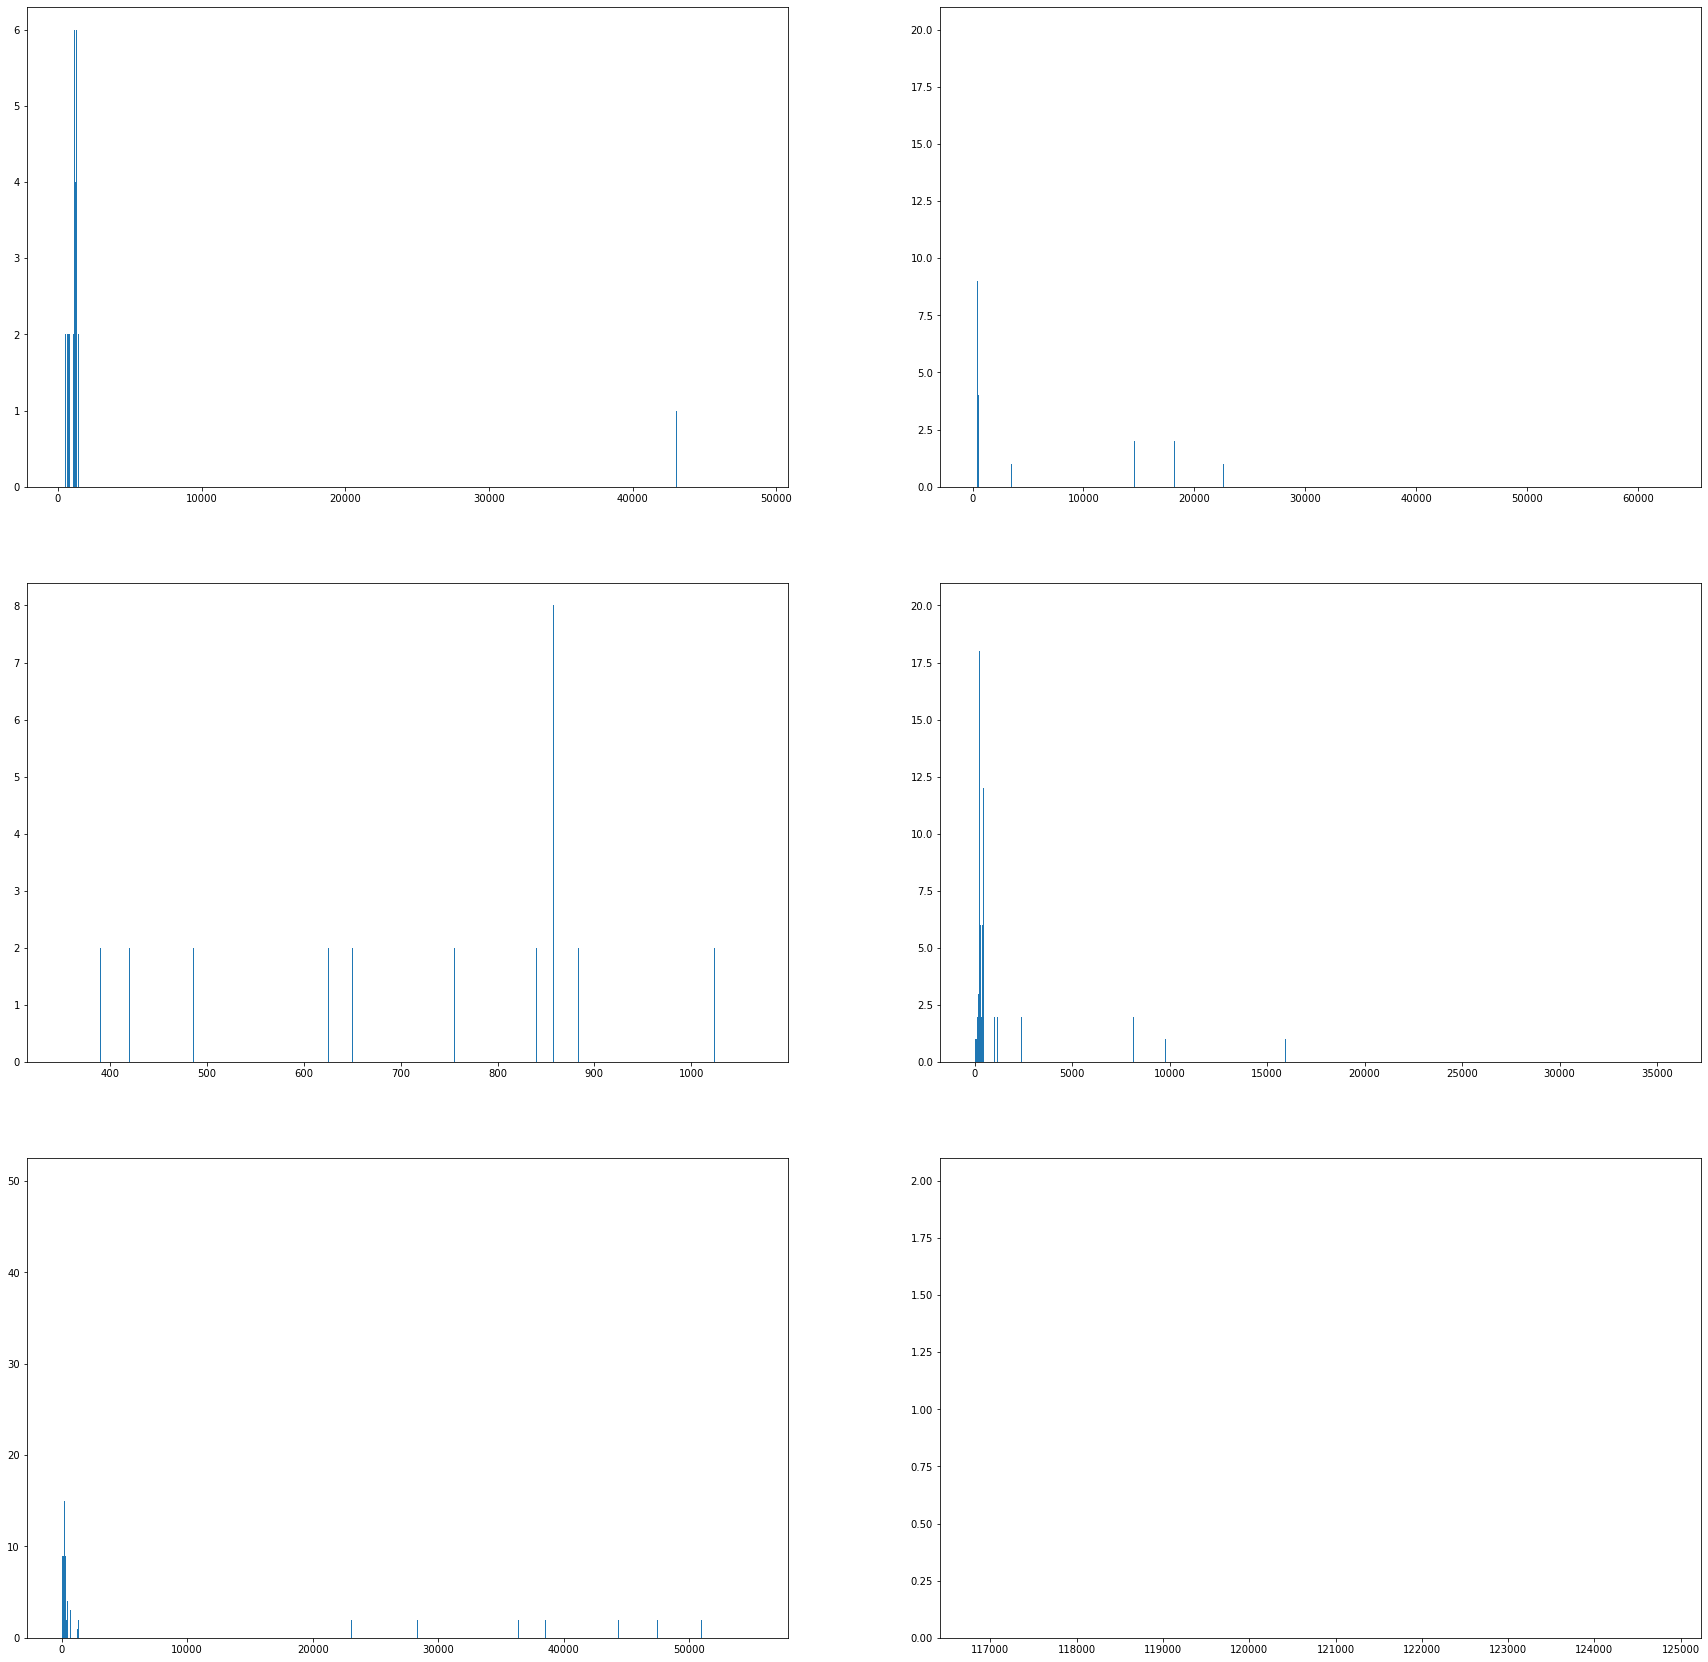

In [43]:
plt.figure(figsize=(30, 30))
i = 0
for area in dice_areas:
    
    ax1 = plt.subplot(3, 2, i+1)
    ax1.hist(area, bins=1000)
    i += 1
    
    